# <center> Fuel Prices Openpricengine ⛽</center>

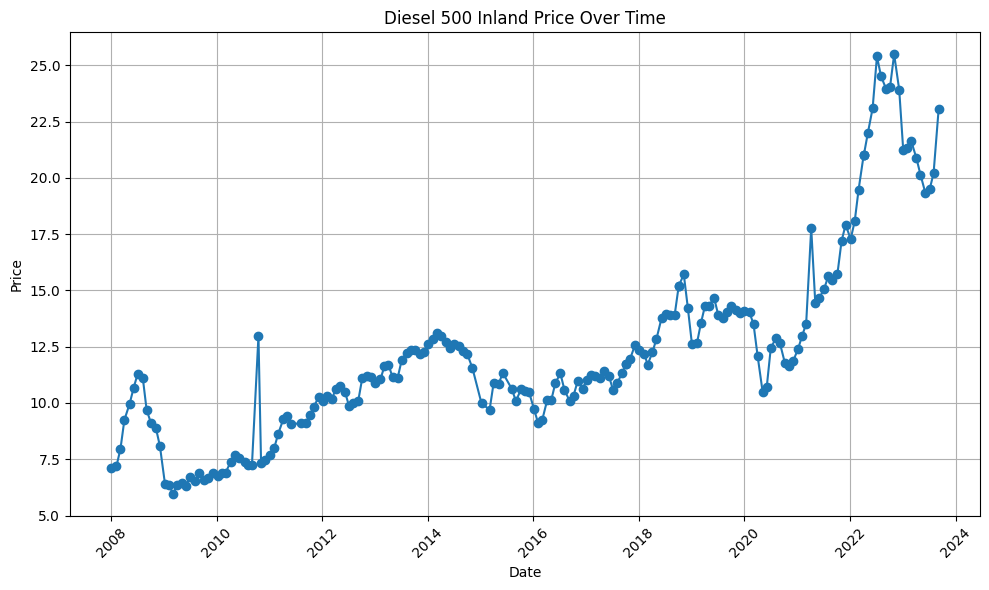

In [1]:
import matplotlib.pyplot as plt
import json
from datetime import datetime
import requests
import numpy as np
import os


api_key = 'YOUR_API_KEY'

url = 'https://openpricengine.com/api/v0.2/fuel/price?fuel_type=diesel500inland'

headers = {
    'accept': 'application/json',
    'Authorization': api_key
}

response = requests.get(url, headers=headers)
data = response.json()

# Extract dates and values from the data
dates = [list(entry.keys())[0] for entry in data["Diesel 500 Inland"]]
values = [entry[dates[i]] for i, entry in enumerate(data["Diesel 500 Inland"])]

# Convert dates to datetime objects
dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(dates, values, marker='o', linestyle='-')
plt.title("Diesel 500 Inland Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


In [2]:
# Calculate the percentage change between two dates
date1 = '2020-11-04'
date2 = '2022-07-06'

value1 = values[dates.index(datetime.strptime(date1, '%Y-%m-%d'))]
value2 = values[dates.index(datetime.strptime(date2, '%Y-%m-%d'))]

percentage_change = ((value2 - value1) / value1) * 100

print(f'Percentage Change from {date1} to {date2}: {percentage_change:.2f}%')

Percentage Change from 2020-11-04 to 2022-07-06: 118.03%
